### Team Mini Project: CAPO and Time to Clinical Stability <br> DS4-450-01 Data Science Senior Capstone <br> Chess & DS: Tess Anderson and Caleb Puckett

#### Importing Necessary Libraries & Loading the Dataset

In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [508]:
data = pd.read_csv('capo_data.csv')
data.head()

,case_id,dem_age,dem_sex,dem_pregnant,dem_trimester,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,...,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral
0,16,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,1,0,0,1,1,1,1
1,17,60.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,18,45.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0,0,0,0,0,0,0,0
3,19,35.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
4,20,61.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [509]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 100 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   case_id                  8230 non-null   int64  
 1   dem_age                  8223 non-null   float64
 2   dem_sex                  8226 non-null   float64
 3   dem_pregnant             894 non-null    float64
 4   dem_trimester            19 non-null     float64
 5   exam_height              3213 non-null   float64
 6   exam_weight              3303 non-null   float64
 7   exam_hr                  5105 non-null   float64
 8   exam_rr                  3099 non-null   float64
 9   exam_sbp                 3623 non-null   float64
 10  exam_dbp                 3620 non-null   float64
 11  exam_temp                5113 non-null   float64
 12  exam_o2sat               3727 non-null   float64
 13  exam_o2satvalue          3444 non-null   float64
 14  exam_fio2              

#### Creating working dataset which includes only Demographic, Exam, and Chest X-Ray data.

In [510]:
df = data[['case_id', 'dem_age', 'dem_sex', 'dem_pregnant', 'dem_trimester','exam_height', 'exam_weight', 'exam_hr', 'exam_rr', 'exam_sbp', 'exam_dbp', 'exam_temp', 'exam_o2sat', 'exam_o2satvalue', 'exam_fio2', 'exam_mental', 'cx_rul', 'cx_rml', 'cx_rll', 'cx_lul', 'cx_lll', 'cx_db', 'cx_du', 'cx_cav', 'cx_pe']]

In [511]:
df.head()

,case_id,dem_age,dem_sex,dem_pregnant,dem_trimester,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,...,exam_mental,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_db,cx_du,cx_cav,cx_pe
0,16,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,0.0
1,17,60.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,0.0
2,18,45.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,0.0
3,19,35.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,0.0,0.0
4,20,61.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0


#### Returning to original dataset: Using daily binary data on four criteria to generate TCS column (will be added to smaller dataset when calculated)

In [512]:
# dropping day 0 columns because they won't be useful - no patient is clinically stable on day 0 or they wouldn't be admitted. 
data = data.drop(columns = ['day0test___cough', 'day0test___afebrile', 'day0test___wbc', 'day0test___oral' ])

In [513]:
# creating conditions and labels to match to generate TCS column
conditions = [
    (data['day1test___cough'] == 1) & (data['day1test___afebrile'] == 1) & (data['day1test___wbc'] == 1) & (data['day1test___oral'] == 1),
    (data['day2test___cough'] == 1) & (data['day2test___afebrile'] == 1) & (data['day2test___wbc'] == 1) & (data['day2test___oral'] == 1),
    (data['day3test___cough'] == 1) & (data['day3test___afebrile'] == 1) & (data['day3test___wbc'] == 1) & (data['day3test___oral'] == 1),
    (data['day4test___cough'] == 1) & (data['day4test___afebrile'] == 1) & (data['day4test___wbc'] == 1) & (data['day4test___oral'] == 1),
    (data['day5test___cough'] == 1) & (data['day5test___afebrile'] == 1) & (data['day5test___wbc'] == 1) & (data['day5test___oral'] == 1),
    (data['day6test___cough'] == 1) & (data['day6test___afebrile'] == 1) & (data['day6test___wbc'] == 1) & (data['day6test___oral'] == 1),
    (data['day7test___cough'] == 1) & (data['day7test___afebrile'] == 1) & (data['day7test___wbc'] == 1) & (data['day7test___oral'] == 1)]
labels = [1,2,3,4,5,6,7]
data['TCS'] = np.select(conditions, labels, 8)

In [514]:
data.head()

,case_id,dem_age,dem_sex,dem_pregnant,dem_trimester,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,...,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral,TCS
0,16,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,1,1,1,8
1,17,60.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,18,45.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,5
3,19,35.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,4
4,20,61.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4


#### Adding TCS column to working dataset

In [515]:
df = df.assign(TCS = data['TCS'])

In [516]:
df.head()

,case_id,dem_age,dem_sex,dem_pregnant,dem_trimester,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,...,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_db,cx_du,cx_cav,cx_pe,TCS
0,16,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,0.0,8
1,17,60.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,0.0,1
2,18,45.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,0.0,5
3,19,35.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,1.0,NaN,NaN,0.0,0.0,4
4,20,61.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,4


#### Dropping columns with majority null values.
##### Generally, imputation should not be performed if over 30% of the values are missing. In our dataset of 8,230 observations, columns with less than 5,761 non-null values should be removed, unless there is a significant reason for the variable to remain in the dataset. 

In [517]:
df.info()
# many columns have fewer than 5,761 non-null values - the only ones that do not are: dem_age, dem_sex, exam_mental, cx_rul, cx_rml, cx_rll, cx_lul, cx_lll, cx_cav, cx_pe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   case_id          8230 non-null   int64  
 1   dem_age          8223 non-null   float64
 2   dem_sex          8226 non-null   float64
 3   dem_pregnant     894 non-null    float64
 4   dem_trimester    19 non-null     float64
 5   exam_height      3213 non-null   float64
 6   exam_weight      3303 non-null   float64
 7   exam_hr          5105 non-null   float64
 8   exam_rr          3099 non-null   float64
 9   exam_sbp         3623 non-null   float64
 10  exam_dbp         3620 non-null   float64
 11  exam_temp        5113 non-null   float64
 12  exam_o2sat       3727 non-null   float64
 13  exam_o2satvalue  3444 non-null   float64
 14  exam_fio2        1842 non-null   float64
 15  exam_mental      7740 non-null   float64
 16  cx_rul           8159 non-null   float64
 17  cx_rml        

In [518]:
# there are many entries with many null values at the beginning of the dataset and they begin to be more omplete after caseid = 3477. we limit the dataset to the cases after this point and reevaluate the null values. 
df = df[df.case_id >=3477]

In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5174 entries, 3056 to 8229
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   case_id          5174 non-null   int64  
 1   dem_age          5167 non-null   float64
 2   dem_sex          5170 non-null   float64
 3   dem_pregnant     893 non-null    float64
 4   dem_trimester    19 non-null     float64
 5   exam_height      2726 non-null   float64
 6   exam_weight      2816 non-null   float64
 7   exam_hr          5013 non-null   float64
 8   exam_rr          3099 non-null   float64
 9   exam_sbp         3623 non-null   float64
 10  exam_dbp         3620 non-null   float64
 11  exam_temp        4871 non-null   float64
 12  exam_o2sat       3726 non-null   float64
 13  exam_o2satvalue  3444 non-null   float64
 14  exam_fio2        1842 non-null   float64
 15  exam_mental      4958 non-null   float64
 16  cx_rul           5103 non-null   float64
 17  cx_rml          

In [520]:
5174*.7
# columns with less than 3621 non-null values should be dropped as they are not suitable for imputation. these columns are: dem_pregnant, dem_trimester, exam_height, exam_weight, exam_rr, exam_dbp*, exam_fio2, cx_db, cx_du.
df = df.drop(columns=['dem_pregnant','dem_trimester','exam_height','exam_weight', 'exam_rr', 'exam_dbp', 'exam_fio2', 'cx_db', 'cx_du'])

In [521]:
df.describe()

,case_id,dem_age,dem_sex,exam_hr,exam_sbp,exam_temp,exam_o2sat,exam_o2satvalue,exam_mental,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe,TCS
count,5174.000000,5167.000000,5170.000000,5013.000000,3623.000000,4871.000000,3726.000000,3444.000000,4958.000000,5103.000000,5104.000000,5112.000000,5101.000000,5112.000000,5145.000000,5146.000000,5174.000000
mean,7380.625628,63.892588,0.585880,99.306403,126.124482,37.490983,0.168277,91.828397,0.146027,0.125220,0.178096,0.413732,0.094295,0.658059,0.004276,0.424019,4.878237
std,4042.933711,19.694538,0.492617,24.550343,26.095801,1.373132,0.374162,7.048597,0.353169,0.331001,0.382631,0.492550,0.292268,0.474406,0.065257,0.870507,2.512574
min,3477.000000,15.000000,0.000000,16.000000,40.000000,26.700000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5029.250000,50.000000,0.000000,84.000000,110.000000,36.700000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,6562.500000,68.000000,1.000000,98.000000,124.000000,37.800000,0.000000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
75%,7985.750000,80.000000,1.000000,112.000000,140.000000,38.300000,0.000000,96.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,8.000000
max,21710.000000,104.000000,1.000000,1000.000000,259.000000,41.200000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,8.000000


In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5174 entries, 3056 to 8229
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   case_id          5174 non-null   int64  
 1   dem_age          5167 non-null   float64
 2   dem_sex          5170 non-null   float64
 3   exam_hr          5013 non-null   float64
 4   exam_sbp         3623 non-null   float64
 5   exam_temp        4871 non-null   float64
 6   exam_o2sat       3726 non-null   float64
 7   exam_o2satvalue  3444 non-null   float64
 8   exam_mental      4958 non-null   float64
 9   cx_rul           5103 non-null   float64
 10  cx_rml           5104 non-null   float64
 11  cx_rll           5112 non-null   float64
 12  cx_lul           5101 non-null   float64
 13  cx_lll           5112 non-null   float64
 14  cx_cav           5145 non-null   float64
 15  cx_pe            5146 non-null   float64
 16  TCS              5174 non-null   int64  
dtypes: float64(15), 

In [523]:
df["dem_age"].fillna(df["dem_age"].mean(), inplace = True)
df["dem_sex"].fillna(0, inplace = True)
df["exam_hr"].fillna(df["exam_hr"].mean(), inplace = True)
df["exam_sbp"].fillna(df["exam_sbp"].mean(), inplace = True)
df["exam_temp"].fillna(df["exam_temp"].mean(), inplace = True)
df["exam_o2sat"].fillna(0, inplace = True)
df["exam_o2satvalue"].fillna(df["exam_o2satvalue"].mean(), inplace = True) # may be more suited to different imputation method
df["exam_mental"].fillna(df["exam_mental"].mean(), inplace = True)
df["cx_rul"].fillna(0, inplace = True)
df["cx_rml"].fillna(0, inplace = True)
df["cx_rll"].fillna(0, inplace = True)
df["cx_lul"].fillna(0, inplace = True)
df["cx_lll"].fillna(0, inplace = True)
df["cx_rul"].fillna(0, inplace = True)
df["cx_cav"].fillna(0, inplace = True)
df["cx_pe"].fillna(0, inplace = True)

In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5174 entries, 3056 to 8229
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   case_id          5174 non-null   int64  
 1   dem_age          5174 non-null   float64
 2   dem_sex          5174 non-null   float64
 3   exam_hr          5174 non-null   float64
 4   exam_sbp         5174 non-null   float64
 5   exam_temp        5174 non-null   float64
 6   exam_o2sat       5174 non-null   float64
 7   exam_o2satvalue  5174 non-null   float64
 8   exam_mental      5174 non-null   float64
 9   cx_rul           5174 non-null   float64
 10  cx_rml           5174 non-null   float64
 11  cx_rll           5174 non-null   float64
 12  cx_lul           5174 non-null   float64
 13  cx_lll           5174 non-null   float64
 14  cx_cav           5174 non-null   float64
 15  cx_pe            5174 non-null   float64
 16  TCS              5174 non-null   int64  
dtypes: float64(15), 

#### Generating a survival curve using Sci-Kit Learn library

In [525]:
# Making a stable column: 1 indicates the patient became stable at some point on or before day 7, 0 indicates the patient did not become stable

stable_list = [1,2,3,4,5,6,7]
def get_stable(tcs):
    if tcs in stable_list:
        return 1
    else:
        return 0

In [526]:
df['Stable'] = df['TCS'].apply(get_stable)

In [527]:
df.head()

,case_id,dem_age,dem_sex,exam_hr,exam_sbp,exam_temp,exam_o2sat,exam_o2satvalue,exam_mental,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe,TCS,Stable
3056,3477,69.0,0.0,105.0,126.124482,38.9,0.0,91.828397,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
3057,3478,48.0,1.0,100.0,126.124482,40.0,0.0,91.828397,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4,1
3058,3479,80.0,0.0,117.0,126.124482,36.1,0.0,91.828397,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8,0
3059,3480,64.0,1.0,114.0,126.124482,37.8,0.0,91.828397,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2,1
3060,3481,21.0,0.0,100.0,126.124482,38.3,0.0,91.828397,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,1


In [528]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# create a kaplanmeierfitter object
kmf = KaplanMeierFitter()

T = df['TCS']
S = df['Stable']

<Axes: title={'center': 'Kaplan-Meier Estimate for TCS'}, xlabel='timeline'>

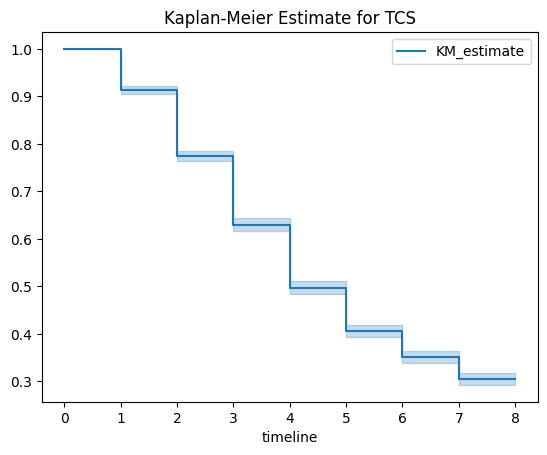

In [529]:
kmf.fit(T,S)
kmf.plot(title = 'Kaplan-Meier Estimate for TCS')

#### Building a Linear Regression Model: Using Dem, Exam, and Chest X-ray Data to predict TCS

In [530]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [531]:
# Splitting the dataset into dependent and independent
X = df.drop(columns=['case_id', 'TCS', 'Stable'])
y = df['TCS']

# Splitting the datasets into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Training the model
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.06189158858710908


#### Building a Logistic Regression Model: Stable/Not Stable

In [532]:
# Dependent variable is now ready - we can procede with building logistic regression model.

# Splitting dependent and independent - independent is the same, we reuse X variable from linear regression
y = df['Stable']

# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# import the class
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/tessanderson/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


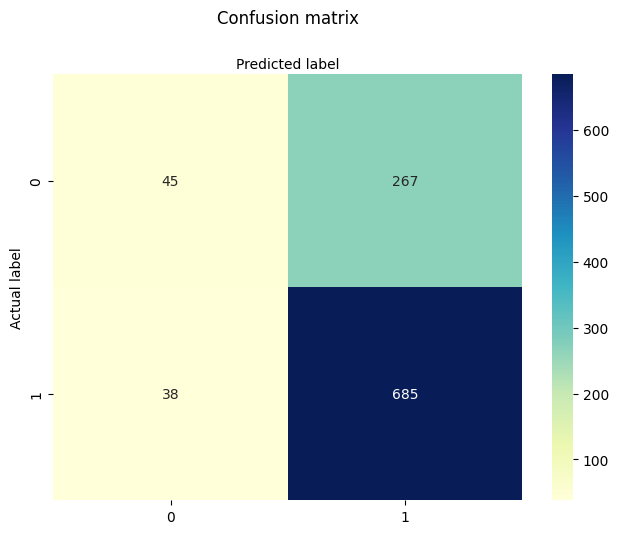

In [533]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [534]:
from sklearn.metrics import classification_report
target_names = ['not stable', 'stable']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  not stable       0.54      0.14      0.23       312
      stable       0.72      0.95      0.82       723

    accuracy                           0.71      1035
   macro avg       0.63      0.55      0.52      1035
weighted avg       0.67      0.71      0.64      1035



#### Building a Logistic Regression Model: Early TCS/Late TCS

In [535]:
early_list = [1,2,3]
late_list = [4,5,6,7]
def get_early_late(tcs):
    if tcs in early_list:
        return 0
    elif tcs in late_list:
        return 1
    else:
        return 'Not stable'

In [536]:
df['Early/Late'] = df['TCS'].apply(get_early_late)

In [537]:
df.head()

,case_id,dem_age,dem_sex,exam_hr,exam_sbp,exam_temp,exam_o2sat,exam_o2satvalue,exam_mental,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe,TCS,Stable,Early/Late
3056,3477,69.0,0.0,105.0,126.124482,38.9,0.0,91.828397,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0
3057,3478,48.0,1.0,100.0,126.124482,40.0,0.0,91.828397,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4,1,1
3058,3479,80.0,0.0,117.0,126.124482,36.1,0.0,91.828397,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8,0,Not stable
3059,3480,64.0,1.0,114.0,126.124482,37.8,0.0,91.828397,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2,1,0
3060,3481,21.0,0.0,100.0,126.124482,38.3,0.0,91.828397,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,1,1


In [538]:
# Removing Not stable entries for this analysis
# create a Boolean mask for the rows to remove
mask = df['Early/Late'] == 'Not stable'

# select all rows except the ones that contain 'Coca Cola'
df = df[~mask]

# print the resulting DataFrame
df.head()

,case_id,dem_age,dem_sex,exam_hr,exam_sbp,exam_temp,exam_o2sat,exam_o2satvalue,exam_mental,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe,TCS,Stable,Early/Late
3056,3477,69.0,0.0,105.0,126.124482,38.9,0.0,91.828397,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0
3057,3478,48.0,1.0,100.0,126.124482,40.0,0.0,91.828397,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4,1,1
3059,3480,64.0,1.0,114.0,126.124482,37.8,0.0,91.828397,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2,1,0
3060,3481,21.0,0.0,100.0,126.124482,38.3,0.0,91.828397,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,1,1
3061,3482,67.0,0.0,98.0,126.124482,40.0,1.0,91.828397,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3,1,0


In [539]:
# Dependent variable is now ready - we can procede with building logistic regression model.

# Splitting dependent and independent
X = df.drop(columns=['case_id', 'TCS', 'Stable', 'Early/Late'])
y = df['Early/Late']

In [540]:
# adressing value error that y variable was being treated as continuous - variable was encoded and transformed, mdoel now works.
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

[0 1 0 ... 1 0 0]


In [541]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size = 0.2, random_state=42)

# import the class
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

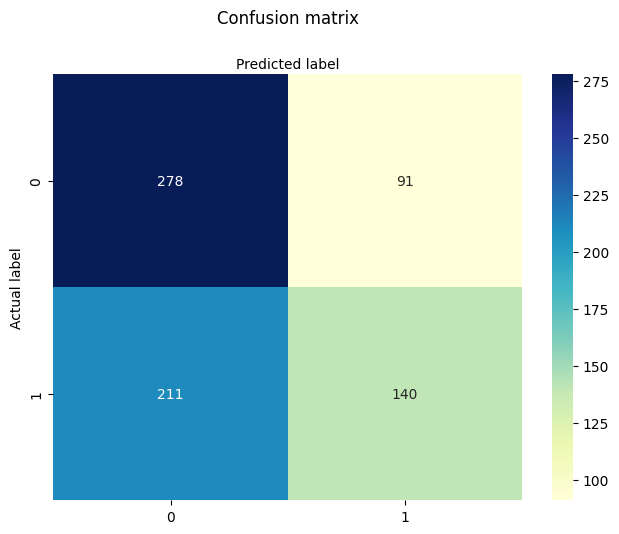

In [542]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [543]:
from sklearn.metrics import classification_report
target_names = ['early TCS', 'late TCS']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   early TCS       0.57      0.75      0.65       369
    late TCS       0.61      0.40      0.48       351

    accuracy                           0.58       720
   macro avg       0.59      0.58      0.56       720
weighted avg       0.59      0.58      0.57       720



#### Running Logistic Regression Models with Lab Columns added

In [544]:
# preparing dataframe
df = data[data.case_id >=3477]

In [545]:
df = df.drop(columns=['dem_pregnant','dem_trimester','exam_height','exam_weight', 'exam_rr', 'exam_dbp', 'exam_fio2', 'cx_db', 'cx_du','lab_bands','lab_inr','lab_bun','lab_bicarb','lab_albumin','lab_ast','lab_alt','lab_bilirubin','lab_trop1', 'lab_trop2', 'lab_trop3',
       'lab_ckmb1', 'lab_ckmb2', 'lab_ckmb3', 'lab_ldl', 'lab_hdl',
       'lab_cholesterol', 'lab_triglycerides', 'lab_lactate', 'lab_hga1c',
       'lab_ldh', 'lab_bnp', 'lab_pct', 'lab_vitamind',
       'lab_abgph', 'lab_abgpaco2', 'lab_abgpao2', 'lab_abgbicarb',
       'lab_abgfio2', 'day1test___cough','lab_crp',
       'day1test___afebrile', 'day1test___wbc', 'day1test___oral',
       'day2test___cough', 'day2test___afebrile', 'day2test___wbc',
       'day2test___oral', 'day3test___cough', 'day3test___afebrile',
       'day3test___wbc', 'day3test___oral', 'day4test___cough',
       'day4test___afebrile', 'day4test___wbc', 'day4test___oral',
       'day5test___cough', 'day5test___afebrile', 'day5test___wbc',
       'day5test___oral', 'day6test___cough', 'day6test___afebrile',
       'day6test___wbc', 'day6test___oral', 'day7test___cough',
       'day7test___afebrile', 'day7test___wbc', 'day7test___oral',
       'over7daytest___cough', 'over7daytest___afebrile', 'over7daytest___wbc',
       'over7daytest___oral'])

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5174 entries, 3056 to 8229
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   case_id          5174 non-null   int64  
 1   dem_age          5167 non-null   float64
 2   dem_sex          5170 non-null   float64
 3   exam_hr          5013 non-null   float64
 4   exam_sbp         3623 non-null   float64
 5   exam_temp        4871 non-null   float64
 6   exam_o2sat       3726 non-null   float64
 7   exam_o2satvalue  3444 non-null   float64
 8   exam_mental      4958 non-null   float64
 9   lab_hematocrit   3542 non-null   float64
 10  lab_hemoglobin   3328 non-null   float64
 11  lab_wbc          4993 non-null   float64
 12  lab_platelets    3540 non-null   float64
 13  lab_na           3546 non-null   float64
 14  lab_k            3528 non-null   float64
 15  lab_creatinine   3502 non-null   float64
 16  lab_glucose      3223 non-null   float64
 17  lab_abg         

In [547]:
df["dem_age"].fillna(df["dem_age"].mean(), inplace = True)
df["dem_sex"].fillna(0, inplace = True)
df["exam_hr"].fillna(df["exam_hr"].mean(), inplace = True)
df["exam_sbp"].fillna(df["exam_sbp"].mean(), inplace = True)
df["exam_temp"].fillna(df["exam_temp"].mean(), inplace = True)
df["exam_o2sat"].fillna(0, inplace = True)
df["exam_o2satvalue"].fillna(df["exam_o2satvalue"].mean(), inplace = True) # may be more suited to different imputation method
df["exam_mental"].fillna(df["exam_mental"].mean(), inplace = True)
df["cx_rul"].fillna(0, inplace = True)
df["cx_rml"].fillna(0, inplace = True)
df["cx_rll"].fillna(0, inplace = True)
df["cx_lul"].fillna(0, inplace = True)
df["cx_lll"].fillna(0, inplace = True)
df["cx_rul"].fillna(0, inplace = True)
df["cx_cav"].fillna(0, inplace = True)
df["cx_pe"].fillna(0, inplace = True)
df['lab_hematocrit'].fillna(df['lab_hematocrit'].mean(), inplace=True)
df['lab_hemoglobin'].fillna(df['lab_hemoglobin'].mean(), inplace=True)
df['lab_wbc'].fillna(df['lab_wbc'].mean(), inplace=True)
df['lab_platelets'].fillna(df['lab_platelets'].mean(), inplace=True)
df['lab_na'].fillna(df['lab_na'].mean(), inplace=True)
df['lab_k'].fillna(df['lab_k'].mean(), inplace=True)
df['lab_creatinine'].fillna(df['lab_creatinine'].mean(), inplace=True)
df['lab_glucose'].fillna(df['lab_glucose'].mean(), inplace=True)
df['lab_abg'].fillna(df['lab_abg'].mean(), inplace=True)

In [548]:
df.columns

Index(['case_id', 'dem_age', 'dem_sex', 'exam_hr', 'exam_sbp', 'exam_temp',
       'exam_o2sat', 'exam_o2satvalue', 'exam_mental', 'lab_hematocrit',
       'lab_hemoglobin', 'lab_wbc', 'lab_platelets', 'lab_na', 'lab_k',
       'lab_creatinine', 'lab_glucose', 'lab_abg', 'cx_rul', 'cx_rml',
       'cx_rll', 'cx_lul', 'cx_lll', 'cx_cav', 'cx_pe', 'TCS'],
      dtype='object')

In [549]:
stable_list = [1,2,3,4,5,6,7]
def get_stable(tcs):
    if tcs in stable_list:
        return 1
    else:
        return 0

In [550]:
df['Stable'] = df["TCS"].apply(get_stable)

In [551]:
# Dependent variable is now ready - we can procede with building logistic regression model.

# Splitting dependent and independent - independent is the same, we reuse X variable from linear regression
X = df.drop(columns=['case_id','TCS','Stable'])
y = df['Stable']

# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# import the class
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


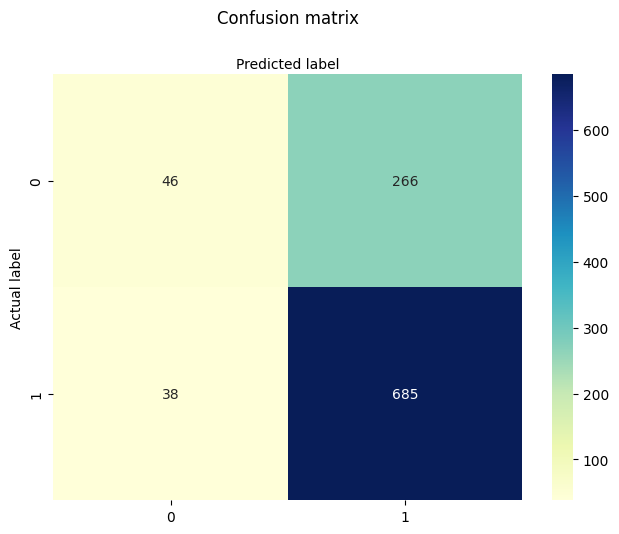

In [553]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [554]:
from sklearn.metrics import classification_report
target_names = ['not stable', 'stable']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  not stable       0.55      0.15      0.23       312
      stable       0.72      0.95      0.82       723

    accuracy                           0.71      1035
   macro avg       0.63      0.55      0.53      1035
weighted avg       0.67      0.71      0.64      1035



In [555]:
early_list = [1,2,3]
late_list = [4,5,6,7]
def get_early_late(tcs):
    if tcs in early_list:
        return 0
    elif tcs in late_list:
        return 1
    else:
        return 'Not stable'

In [556]:
df['Early/Late'] = df['TCS'].apply(get_early_late)

In [557]:
df.head()

,case_id,dem_age,dem_sex,exam_hr,exam_sbp,exam_temp,exam_o2sat,exam_o2satvalue,exam_mental,lab_hematocrit,...,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe,TCS,Stable,Early/Late
3056,3477,69.0,0.0,105.0,126.124482,38.9,0.0,91.828397,0.0,37.613905,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0
3057,3478,48.0,1.0,100.0,126.124482,40.0,0.0,91.828397,0.0,37.613905,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4,1,1
3058,3479,80.0,0.0,117.0,126.124482,36.1,0.0,91.828397,0.0,37.613905,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8,0,Not stable
3059,3480,64.0,1.0,114.0,126.124482,37.8,0.0,91.828397,0.0,37.613905,...,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2,1,0
3060,3481,21.0,0.0,100.0,126.124482,38.3,0.0,91.828397,0.0,37.613905,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,1,1


In [558]:
# Removing Not stable entries for this analysis
# create a Boolean mask for the rows to remove
mask = df['Early/Late'] == 'Not stable'

# select all rows except the ones that contain 'Coca Cola'
df = df[~mask]

# print the resulting DataFrame
df.head()

,case_id,dem_age,dem_sex,exam_hr,exam_sbp,exam_temp,exam_o2sat,exam_o2satvalue,exam_mental,lab_hematocrit,...,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe,TCS,Stable,Early/Late
3056,3477,69.0,0.0,105.0,126.124482,38.9,0.0,91.828397,0.0,37.613905,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0
3057,3478,48.0,1.0,100.0,126.124482,40.0,0.0,91.828397,0.0,37.613905,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4,1,1
3059,3480,64.0,1.0,114.0,126.124482,37.8,0.0,91.828397,0.0,37.613905,...,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2,1,0
3060,3481,21.0,0.0,100.0,126.124482,38.3,0.0,91.828397,0.0,37.613905,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,1,1
3061,3482,67.0,0.0,98.0,126.124482,40.0,1.0,91.828397,0.0,37.613905,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3,1,0


In [559]:
# Dependent variable is now ready - we can procede with building logistic regression model.

# Splitting dependent and independent
X = df.drop(columns=['case_id', 'TCS', 'Stable', 'Early/Late'])
y = df['Early/Late']

In [560]:
# adressing value error that y variable was being treated as continuous - variable was encoded and transformed, mdoel now works.
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

[0 1 0 ... 1 0 0]


In [561]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size = 0.2, random_state=42)

# import the class
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

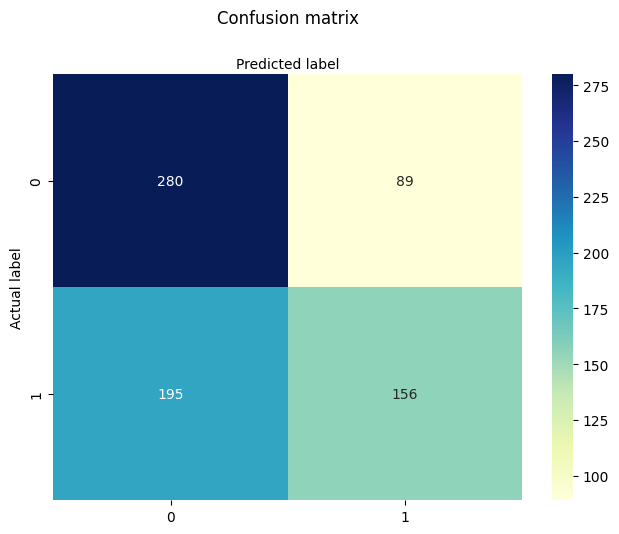

In [562]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [563]:
from sklearn.metrics import classification_report
target_names = ['early TCS', 'late TCS']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   early TCS       0.59      0.76      0.66       369
    late TCS       0.64      0.44      0.52       351

    accuracy                           0.61       720
   macro avg       0.61      0.60      0.59       720
weighted avg       0.61      0.61      0.60       720

